<a href="https://colab.research.google.com/github/caca20/ri-projekat/blob/develop/ri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
import seaborn as sns
import itertools
from tqdm import tqdm
from IPython.display import Audio, display
from keras.utils import np_utils
import soundfile
import os, glob, pickle, sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

from google.colab import files


In [ ]:
# emotions={
#   '01':'neutral',
#   '02':'calm',
#   '03':'happy',
#   '04':'sad',
#   '05':'angry',
#   '06':'fearful',
#   '07':'disgust',
#   '08':'surprised'
# }

# observed_emotions=['calm', 'happy', 'fearful', 'disgust']


In [ ]:
emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'
}


In [ ]:
processec_data = []
data_path = '/content/sample_data/speech-recognition-data2/Crema/'#TODO
for root, dirs, filess in os.walk(data_path):
  for file in filess:
    file_path = os.path.join(root, file)
    dataset = root.split('/')[4]
    if dataset == "Crema":
      emotion = emotions[file.split('_')[2]]
      processec_data.append([file_path, emotion])

data_df = pd.DataFrame(processec_data, columns = ['File_path','Emotion'])

In [ ]:
data_df.to_csv('data_df.csv')
data_df.shape

(1785, 2)

In [ ]:
data_df.head()

,File_path,Emotion
0,/content/sample_data/speech-recognition-data2/...,sad
1,/content/sample_data/speech-recognition-data2/...,sad
2,/content/sample_data/speech-recognition-data2/...,disgust
3,/content/sample_data/speech-recognition-data2/...,happy
4,/content/sample_data/speech-recognition-data2/...,sad


In [ ]:
# def extract_feature(file_name, mfcc, chroma, mel):
#   result = []
#   with soundfile.SoundFile(file_name) as sound_file:
#     X = sound_file.read(dtype="float32")
#     sample_rate=sound_file.samplerate
#     if chroma:
#       stft=np.abs(librosa.stft(X))
#       result=np.array([])
#     if mfcc:
#       mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#       result=np.hstack((result, mfccs))
#     if chroma:
#       chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#       result=np.hstack((result, chroma))
#     if mel:
#       mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#       result=np.hstack((result, mel))
#   return result

In [ ]:
# def load_data(test_size=0.2):
#   x,y=[],[]
#   pom_path = "/content/"
#   print(glob.glob(pom_path+"/*.wav"))
#   for file in glob.glob("/home/caca/Desktop/ri/projekat/speech-emotion-recognition-ravdess-data"+"\*.wav"):
#     print(os.file.abspath(file))
#     file_name=os.path.basename(file)
#     emotion=emotions[file_name.split("-")[2]]
#     if emotion not in emotions:
#       continue
#     feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
#     x.append(feature)
#     y.append(emotion)
#   #return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


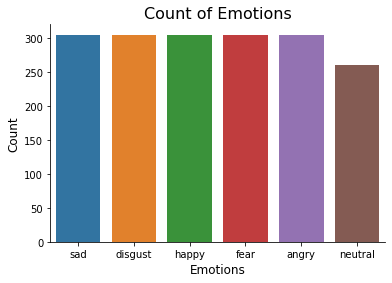

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

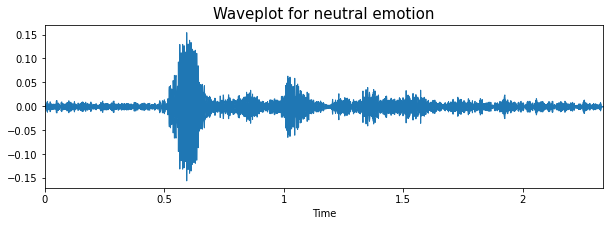

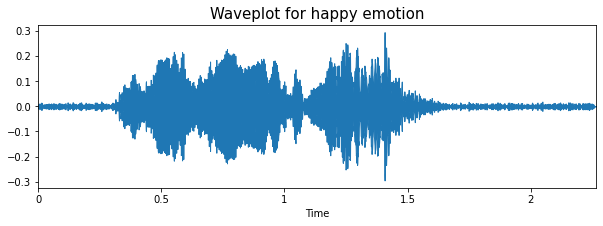

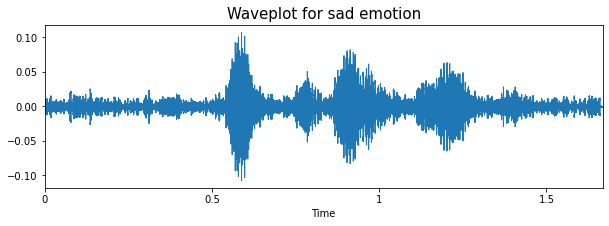

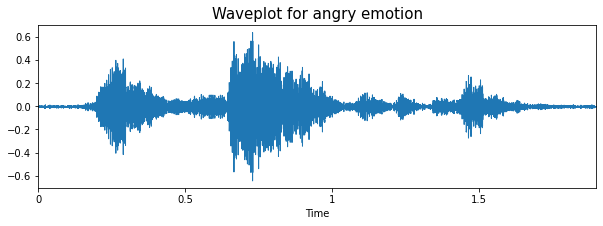

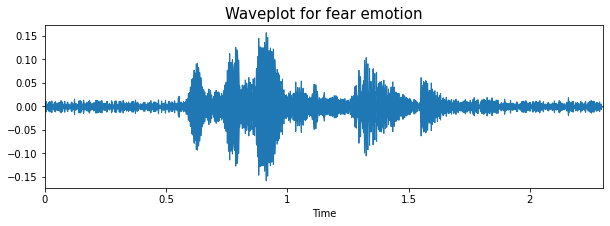

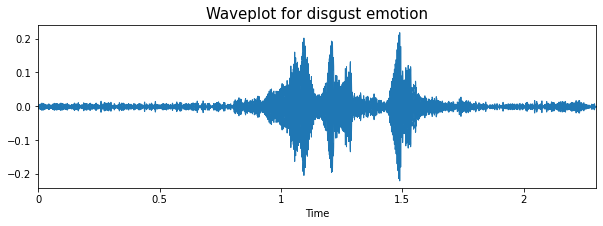

In [ ]:
for emotion in emotions.values():
    path = (data_df[data_df.Emotion == emotion].iloc[0])[0]
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, emotion)
    display(Audio(path))